In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
path = '/content/data.csv'
df =pd.read_csv(path, header=None)
X = df[0]
Y = df[1]

In [14]:
model = LinearRegression()
predictor = model.fit(X.to_numpy().reshape(-1,1), Y)

In [15]:
def CustomMSE(y, yhat):
  m = len(y)
  error = 0
  for i in range(m):
    error += (y[i]-yhat[i])**2
  
  return error/m

In [16]:
yhat = predictor.predict(X.to_numpy().reshape(-1,1))

In [17]:
type(X)

pandas.core.series.Series

#Comparing custom MSE and MSE from sklearn metrics

In [18]:
CustomMSE(Y,yhat)

110.25738346621318

In [19]:
mean_squared_error(Y,yhat)

110.25738346621316

#Cross Validation and Test Division

In [20]:
path = '/content/data2.csv'
df =pd.read_csv(path, header=None)
df = df.iloc[1:,:]
X = df.iloc[:,0]
Y = df.iloc[:,1]
X = X.to_numpy().reshape(-1,1)

In [21]:
xTrain, x, yTrain, y = train_test_split(X,Y,test_size=0.44, random_state = 42)

In [22]:
xCV, xTest, yCV, yTest = train_test_split(x,y,test_size=0.5,random_state=42)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

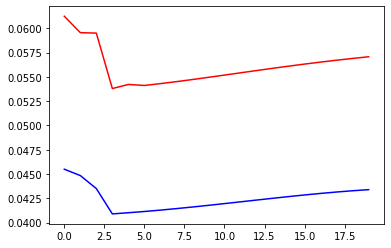


Best performance at degree: 3


In [24]:
degrees = 20
errorTrain = np.zeros(degrees)
errorCV = np.zeros(degrees)
for i in range(degrees):
  poly = PolynomialFeatures(degree = i+1, include_bias=False)
  polyTrain = poly.fit_transform(xTrain)
  polyCV = poly.fit_transform(xCV)
  polynomialModel = LinearRegression()
  polynomialPredictor = polynomialModel.fit(polyTrain,yTrain)
  yhat = polynomialPredictor.predict(polyTrain)
  errorTrain[i] = mean_squared_error(yTrain,yhat)
  yhat = polynomialPredictor.predict(polyCV)
  errorCV[i] = mean_squared_error(yCV,yhat)

plt.plot(errorTrain, color="blue")
plt.plot(errorCV, color="red")
plt.show()

print("\nBest performance at degree:",np.argmin(errorCV))

#Evaluating in association with Regularization

In [25]:
degree = 3
lambdaRange = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
errorCV = np.zeros(len(lambdaRange))
errorTrain = errorCV
polyTrain = PolynomialFeatures(degree=3, include_bias=False).fit_transform(xTrain)
polyCV = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(xCV)

for i in range(len(lambdaRange)):
  model = Ridge(alpha = lambdaRange[i])
  predictor = model.fit(polyTrain,yTrain)
  yhat = predictor.predict(polyCV)
  errorCV[i] = mean_squared_error(yCV,yhat)
  yhat = predictor.predict(polyTrain)
  errorTrain[i] = mean_squared_error(yTrain,yhat)

print("\nBest Resluting index of Lambda=",np.argmin(lambdaRange))


Best Resluting index of Lambda= 0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.29008e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.29009e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.2901e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.29027e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi